# Module 14 – Practice Notebook: Logistic Regression on Iris (Binary)

This is another practice notebook for Module 14 using a **different dataset**.

We will use the classic `sklearn` iris dataset, but convert it into a binary classification problem:

- Target: `Iris-setosa` vs `other species`

You will repeat the same core steps you learned before, but on a new dataset.

**Sections:**
- 0: Setup
- 1: Data loading and preprocessing
- 2: Basic logistic regression
- 3: Evaluation metrics
- 4: L2 regularization
- 5: Threshold exploration

Fill in the `TODO` parts yourself.


## Section 0 – Setup

Run this cell first. It imports all required libraries.


In [1]:
# Imports for the whole notebook

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report
)

plt.rcParams["figure.figsize"] = (6, 4)
plt.rcParams["axes.grid"] = True

print("Setup complete.")

Setup complete.


## Section 1 – Data Loading and Preprocessing

In this section you will:
- Load the iris dataset
- Turn it into a binary classification: `setosa` vs `other`
- Put everything into a DataFrame for quick inspection


In [2]:
# TODO: Load the iris dataset using load_iris() [Done for you]

# Your code here:
data = load_iris()
X = data.data
y_multi = data.target

print("Original target classes:", np.unique(y_multi))
print("Class names:", data.target_names)

Original target classes: [0 1 2]
Class names: ['setosa' 'versicolor' 'virginica']


In [3]:
# TODO: Convert the multiclass target into binary target [Done for you]
# We define y = 1 if the class is 'setosa' (class 0), else 0.
# So the problem becomes: 'setosa' vs 'non setosa'.

# Your code here:
y = (y_multi == 0).astype(int)

print("Binary target classes:", np.unique(y))
print("Number of setosa (1):", y.sum())
print("Number of non setosa (0):", len(y) - y.sum())

Binary target classes: [0 1]
Number of setosa (1): 50
Number of non setosa (0): 100


In [4]:
# TODO: Create a DataFrame for inspection
# Use data.feature_names as column names and add a 'target' column

# Your code here:
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Inspect
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  


In [6]:
# TODO: Show basic statistics of the numeric features using df.describe()

# Your code here:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,0.333333,0.472984,0.0,0.0,0.00,1.0,1.0


## Section 2 – Train Test Split and Scaling

Split the data and scale the features.


In [7]:
# TODO: Split the data into train and test sets
# Use test_size=0.3, random_state=42, stratify=y

# Hint:
# X_train, X_test, y_train, y_test = train_test_split(...)

# Your code here:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Inspect shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", pd.Series(y_train).value_counts())
print("y_test distribution:\n", pd.Series(y_test).value_counts())

X_train shape: (105, 4)
X_test shape: (45, 4)
y_train distribution:
 0    70
1    35
Name: count, dtype: int64
y_test distribution:
 0    30
1    15
Name: count, dtype: int64


In [8]:
# TODO: Scale the features using StandardScaler
# 1. Fit the scaler on X_train and transform X_train
# 2. Use the same scaler to transform X_test

# Your code here:

# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data using the same scaler
X_test_scaled = scaler.transform(X_test)

# Inspect
print("First 5 rows of scaled X_train:\n", X_train_scaled[:5])


First 5 rows of scaled X_train:
 [[-0.16677192 -0.32295137  0.27470219  0.16778873]
 [-0.28837645 -1.24566957  0.10094478 -0.10325461]
 [ 1.41408694  0.36908728  0.56429788  0.3033104 ]
 [-1.01800362  1.06112593 -1.23119538 -0.78086296]
 [ 0.92766883 -0.09227182  0.39054047  0.3033104 ]]


## Section 3 – Basic Logistic Regression

Train a logistic regression model and check accuracy.


In [9]:
# TODO: Train a logistic regression model using LogisticRegression(max_iter=1000)

# Your code here:
# Initialize the model
model = LogisticRegression(max_iter=100)

# Train the model
model.fit(X_train_scaled, y_train)

# Inspect coefficients
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_)


Model coefficients: [[-0.87798886  1.26302921 -1.60916865 -1.47835766]]
Model intercept: [-2.24266703]


In [10]:
# TODO: Predict on the test set and compute accuracy

# Your code here:
y_pred = model.predict(X_test_scaled)

# Compute accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

Test set accuracy: 1.0


## Section 4 – Evaluation Metrics

Now compute more detailed metrics: precision, recall, F1, confusion matrix, and a classification report.


In [14]:
# TODO: Compute precision, recall, and F1 score

# Your code here:
print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [15]:
# TODO: Compute the confusion matrix and print it

# Your code here:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Confusion Matrix:
 [[30  0]
 [ 0 15]]


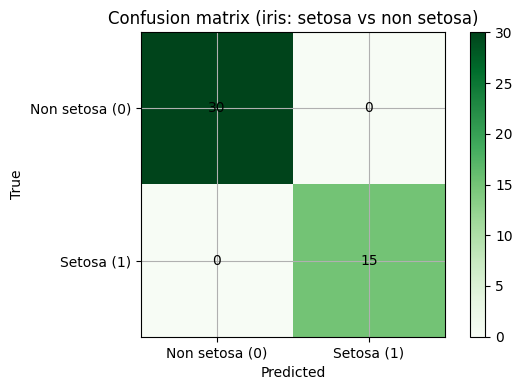

In [16]:
# TODO: Visualize the confusion matrix as an image [Done for you]

# Your code here:
plt.imshow(cm, cmap="Greens")
plt.title("Confusion matrix (iris: setosa vs non setosa)")
plt.colorbar()
plt.xticks([0, 1], ["Non setosa (0)", "Setosa (1)"])
plt.yticks([0, 1], ["Non setosa (0)", "Setosa (1)"])
plt.xlabel("Predicted")
plt.ylabel("True")

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.tight_layout()
plt.show()

In [18]:
# TODO: Print the classification report

# Your code here:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



## Section 5 – L2 Regularization Study

Train two models with different C values and compare accuracies and coefficient sizes.

- Model A: C = 1000 (weak regularization)
- Model B: C = 0.01 (strong regularization)


In [19]:
# TODO: Train two logistic regression models with different C values

# Your code here:
# Initialize two logistic regression models with different regularization strengths
model_str = LogisticRegression(C=0.1, max_iter=1000)
model_wk = LogisticRegression(C=10, max_iter=1000)

# Train both models
model_str.fit(X_train_scaled, y_train)
model_wk.fit(X_train_scaled, y_train)

# Predict on test set
y_pred1 = model_str.predict(X_test_scaled)
y_pred2 = model_wk.predict(X_test_scaled)

# Compute accuracies
accuracy1 = accuracy_score(y_test, y_pred1)
accuracy2 = accuracy_score(y_test, y_pred2)

print(f"Accuracy with C=0.1: {accuracy1}")
print(f"Accuracy with C=10: {accuracy2}")


Accuracy with C=0.1: 1.0
Accuracy with C=10: 1.0


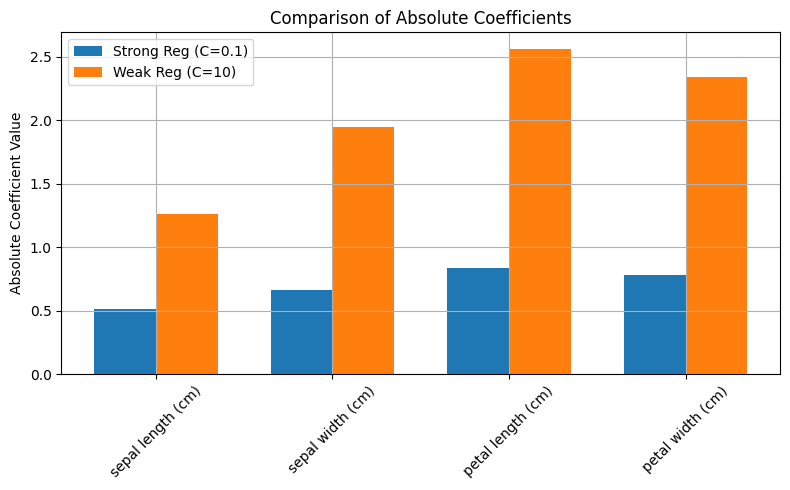

In [21]:
# TODO: Plot the absolute coefficients for all features for both models

# Hint:
# coef_weak = clf_weak.coef_[0]
# coef_strong = clf_strong.coef_[0]

# Your code here:
# Get coefficients
coef_strong = model_str.coef_[0]
coef_weak = model_wk.coef_[0]

# Feature names
features = data.feature_names

# Plot
x = np.arange(len(features))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, np.abs(coef_strong), width, label='Strong Reg (C=0.1)')
plt.bar(x + width/2, np.abs(coef_weak), width, label='Weak Reg (C=10)')

plt.xticks(x, features, rotation=45)
plt.ylabel('Absolute Coefficient Value')
plt.title('Comparison of Absolute Coefficients')
plt.legend()
plt.tight_layout()
plt.show()

**Questions for you:**

- Which model has smaller coefficients overall?
- Do you see a big difference in accuracy?
- When might you prefer stronger regularization in a small dataset like iris?


## Section 6 – Threshold Exploration

Experiment with different probability thresholds and see how precision and recall change.


In [22]:
# TODO: Get predicted probabilities from the base model `clf`
# Use the positive class probability (setosa = 1).

# Your code here:
# Get predicted probabilities
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # probability of class 1 (setosa)

# Inspect
print("First 10 predicted probabilities:", y_proba[:10])


First 10 predicted probabilities: [9.76573959e-01 1.18711315e-03 9.96389913e-01 1.63883356e-02
 9.78289771e-01 9.82147730e-01 7.06267467e-03 4.34800894e-03
 9.75791027e-04 7.39849803e-01]


In [30]:

# Define thresholds
thresholds = np.linspace(0.1, 0.9, 9)

# Store metrics
metrics = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)  # Convert probabilities to binary predictions
    precision = precision_score(y_test, y_pred_thresh)
    recall = recall_score(y_test, y_pred_thresh)
    f1 = f1_score(y_test, y_pred_thresh)
    metrics.append([t, precision, recall, f1])

# Create DataFrame
thr_df = pd.DataFrame(metrics, columns=['threshold', 'precision', 'recall', 'f1'])
print(thr_df)


   threshold  precision    recall        f1
0        0.1        1.0  1.000000  1.000000
1        0.2        1.0  1.000000  1.000000
2        0.3        1.0  1.000000  1.000000
3        0.4        1.0  1.000000  1.000000
4        0.5        1.0  1.000000  1.000000
5        0.6        1.0  1.000000  1.000000
6        0.7        1.0  1.000000  1.000000
7        0.8        1.0  0.933333  0.965517
8        0.9        1.0  0.933333  0.965517


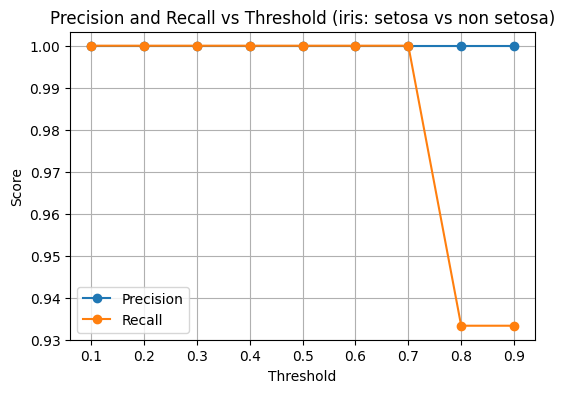

In [31]:
# TODO: Plot precision and recall vs threshold [Done for you]

# Your code here:
plt.plot(thr_df["threshold"], thr_df["precision"], marker="o", label="Precision")
plt.plot(thr_df["threshold"], thr_df["recall"], marker="o", label="Recall")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Threshold (iris: setosa vs non setosa)")
plt.legend()
plt.grid(True)
plt.show()

**Reflection:**

- When you lower the threshold, what happens to recall? What about precision?
- If you treat 'setosa' as a rare, important species that you never want to miss, what kind of threshold would you choose?

By now, you have implemented logistic regression on yet another dataset. This should make you confident that the ideas transfer across datasets, not just work on one example.
